In [9]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
%load_ext autoreload
%autoreload 2
import model.dataset as ds
import model.models
import scipy.spatial.distance as ssdist
import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy.io.wavfile
from scipy.fftpack import dct
import scipy.signal
import IPython.display
import pandas as pd
from pydub import AudioSegment as auseg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
torch.cuda.empty_cache()

### Loading the dataset

set up dataloader

In [23]:
# path = '/home/ubuntu/datasets/processed/mixer/2-20000-2/test';
path = '/work/tianjunm/dataset/processed/datagen/t0-2s-25c/train.csv';

# d = ds.SignalDataset(root_dir=path, transform=ds.Concat(size=(129, 231), encdec=True))
# d = ds.SignalDataset(root_dir=new, transform=ds.ToTensor(size=(129, 690)))
d = ds.MixtureDataset(num_sources=2, data_path=path, transform=ds.Wav2Spect('Concat', enc_dec=True))

 77%|███████▋  | 40/52 [00:00<00:00, 186.66 Computational Sequence Entries/s]

<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...


 12%|█▏        | 12/99 [00:00<00:00, 101.06 Computational Sequence Entries/s]

<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the in

<Success>: <cut_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_applause> computational sequence ...
<Success>: <cut_16000_applause> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the 

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]          

<Success>: <cut_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_snoring> computational sequence ...
<Success>: <cut_16000_snoring> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the dat

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integ

 16%|█▌        | 16/100 [00:00<00:01, 54.22 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...


<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the

 19%|█▉        | 19/100 [00:00<00:00, 165.84 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]          

<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the dat

 25%|██▍       | 17/69 [00:00<00:00, 168.43 Computational Sequence Entries/s]

<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_tearing> computational sequence ...


<Success>: <cut_16000_tearing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_tearing> computational sequence ...
<Success>: <cut_16000_tearing> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the dat

 13%|█▎        | 13/99 [00:00<00:00, 123.03 Computational Sequence Entries/s]

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> compu

<Success>: <cut_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_tambourine> computational sequence ...
<Success>: <cut_16000_tambourine> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity o

  7%|▋         | 7/100 [00:00<00:01, 61.99 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tearing.csd ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]          

<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the dat

<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_tearing> computational sequence ...
<Succes

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]         

<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/aud

  0%|          | 0/93 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_tearing> computational sequence ...
<Succes

 85%|████████▍ | 84/99 [00:00<00:00, 303.27 Computational Sequence Entries/s]

<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...


<Success>: <cut_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data in <cut

<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_tearing> computational sequence ...
<Success>: <cut_16000_tearing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_tearing> computational sequence ...
<Success>: <cut_16000_tearing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tambourine.csd ...
<Status>: Checking the integrity of the data in <cut_16000_tambourine> computational sequence ...
<Success>: <cut_16000_

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]         


<Status>: Checking the integrity of the metadata in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computat

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_tearing> computational sequence ...
<Succes

 33%|███▎      | 25/75 [00:00<00:00, 204.38 Computational Sequence Entries/s]

<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> comput

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]         

<Success>: <cut_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity o

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> compu

  0%|          | 0/75 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_tambourine> computational sequence ...
<Success>: <cut_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/trumpet.csd ...
<Status>: Checking the integrity of the data in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_160

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s]          

<Success>: <cut_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...

  0%|          | 0/69 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_applause> computational sequence ...
<Success>: <cut_16000_applause> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/snoring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_snoring> computational sequence ...
<Success>: <cut_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_snoring> computational sequence ...
<Success>: <cut_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/child_speech.csd ...
<Status>: Checking the integrity of the data in <cut_16000_child_speech> computational sequence ...
<Success>: <cut

<Success>: <cut_16000_tearing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_tearing> computational sequence ...
<Success>: <cut_16000_tearing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tambourine.csd ...
<Status>: Checking the integrity of the data in <cut_16000_tambourine> computational sequence ...
<Success>: <cut_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_tambourine> computational sequence ...
<Success>: <cut_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/trumpet.csd ...
<Status>: Checking the integrity of the data in <cut_16000_trumpet> computational sequence ...
<Success>: <c

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/lawn_mower.csd ...
<Status>: Checking the integrity of the data in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn

  3%|▎         | 3/99 [00:00<00:06, 14.21 Computational Sequence Entries/s]

<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_16000_piano> computational sequence ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]        

<Success>: <cut_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data in <

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> compu

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> comput

  0%|          | 0/96 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bass_guitar> computational sequenc

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]         

<Success>: <cut_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bass_guitar> computational sequence ...
<Success>: <cut_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrit

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> compu

  0%|          | 0/75 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_tambourine> computational sequence ...
<Success>: <cut_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/trumpet.csd ...
<Status>: Checking the integrity of the data in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_160

  0%|          | 0/102 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_160

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]          

<Success>: <cut_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_flute> computational sequence ...
<Success>: <cut_16000_flute> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data in <

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> compu

<Success>: <cut_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_tambourine> computational sequence ...
<Success>: <cut_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/trumpet.csd ...
<Status>: Checking the integrity of the data in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_160

<Success>: <cut_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_160

 34%|███▍      | 33/97 [00:00<00:00, 124.13 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_ukulele> computational sequence ...


<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the dat

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> compu

<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> comput

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_160

<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of th

  0%|          | 0/69 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_applause> computational sequence ...
<Success>: <cut_16000_applause> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/snoring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_snoring> computational sequence ...
<Success>: <cut_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_snoring> computational sequence ...
<Success>: <cut_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/child_speech.csd ...
<Status>: Checking the integrity of the data in <cut_16000_child_speech> computational sequence ...
<Success>: <cut

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_tearing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_tearing> computational sequence ...
<Success>: <cut_16000_tearing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tambourine.csd ...
<Status>: Checking the integrity of the data in <cut_16000_tambourine> computational sequence ...
<Success>: <cut_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_tambourine> computational sequence ...
<Success>: <cut_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/trumpet.csd ...
<Status>: Checking the integrity of the data in <cut_16000_trumpet> computational sequence ...
<Success>: <c

  0%|          | 0/102 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/lawn_mower.csd ...
<Status>: Checking the integrity of the data in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational

  0%|          | 0/75 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_flute> computational sequence ...
<Success>: <cut_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_

<Success>: <cut_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_waterfall> computational sequence ...
<Success>: <cut_16000_waterfall> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of t

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_tearing> computational sequence ...
<Success>: <cut_16000_tearing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_tearing> computational sequence ...
<Success>: <cut_16000_tearing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tambourine.csd ...
<Status>: Checking the in

<Success>: <cut_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/lawn_mower.csd ...
<Status>: Checking the integrity of the data in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational

 12%|█▏        | 12/98 [00:00<00:00, 97.21 Computational Sequence Entries/s]

<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_16000_waterfall> computational sequenc

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]         

<Success>: <cut_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data in <

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> compu

<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> comput

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s] 

<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bass_g

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_16000_waterfall> computational sequenc

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]         

<Success>: <cut_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxophone> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of t

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> compu

<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> comput

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_160

  0%|          | 0/50 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_16000_waterfall> computational sequenc

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]         

<Success>: <cut_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data in <cut_16

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> compu

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_tambourine> computational sequence ...
<Success>: <cut_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/trumpet.csd ...
<Status>: Checking the integrity of the data in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_160

<Success>: <cut_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/lawn_mower.csd ...
<Status>: Checking the integrity of the data in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/flute.csd ...
<Status>: Checking the integrity of the data in <cut_16000_flute> computational sequence ...
<Success>: <cut_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_flute> computational sequence ...
<Success>: <cut_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/gun.csd ...
<Status>: Checking the integrity of the data in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fireworks> computational sequence ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]         

<Success>: <cut_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of t

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> compu

  0%|          | 0/75 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/trumpet.csd ...
<Status>: Checking the integrity of the data in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational seq

  0%|          | 0/102 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_160

  0%|          | 0/50 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_flute> computational sequence ...
<Success>: <cut_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_

 30%|███       | 30/100 [00:00<00:00, 278.39 Computational Sequence Entries/s]

<Success>: <cut_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_16000_motorboat> computational sequence ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]          

<Success>: <cut_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of t

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> compu

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> comput

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bass_guitar> computational sequenc

  0%|          | 0/50 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_16000_waterfall> computational sequenc

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_moto

<Success>: <cut_16000_duck> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_duck> computational sequence ...
<Success>: <cut_16000_duck> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data in <cut

<Status>: Checking the integrity of the data in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_tambourine> computational sequence ...
<Success>: <cut_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/trumpet.csd ...
<Status>: Checking the integrity of the data in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_160

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/lawn_mower.csd ...
<Status>: Checking the integrity of the data in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational

<Success>: <cut_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bass_guitar> computational sequence ...
<Success>: <cut_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bass_guitar> computational sequence ...
<Success>: <cut_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/flute.csd ...
<Status>: Checking the integrity of the data in <cut_16000_flute> computational sequence ...
<Success>: <cut_16

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_waterfall> computational sequence ...
<Success>: <cut_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_waterfall> computational sequence ...
<Success>: <cut_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/banjo.csd ...
<Status>: Checking the integrity of the data in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/saxophone.csd ...
<Status>: Checking the integ

  7%|▋         | 7/98 [00:00<00:01, 46.66 Computational Sequence Entries/s]

<Success>: <cut_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_16000_duck> computational sequence ...
<Success>: <cut_16

<Success>: <cut_16000_water> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data in <

  0%|          | 0/93 [00:00<?, ? Computational Sequence Entries/s] 

<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tearing.csd ...


  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computati

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bass_guitar> computational sequence ...
<Success>: <cut_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bass_guitar> computational sequence ...
<Success>: <cut_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/flute.csd ...
<Status>: Checking the integrity of the data in <cut_16000_flute> computational sequence ...
<Success>: <cut_16

<Success>: <cut_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/gun.csd ...
<Status>: Checking the integrity of the data in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> compu

 32%|███▏      | 32/100 [00:00<00:00, 316.33 Computational Sequence Entries/s]

<Success>: <cut_16000_water> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/firetruck_siren.csd ...
<Status>: Checking the integrity of the data in <cut_16000_firetruck_siren> computational sequence ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]          

<Success>: <cut_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking 

  0%|          | 0/93 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_tearing> computational sequence ...
<Succes

<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computati

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Status>: Checking the integrity of the data in <cut_16000_bass_guitar> computational sequence ...
<Success>: <cut_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bass_guitar> computational sequence ...
<Success>: <cut_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/flute.csd ...
<Status>: Checking the integrity of the data in <cut_16000_flute> computational sequence ...
<Success>: <cut_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_flute> computational sequence ...
<Success>: <cut_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/ukulele.csd ...
<Status>: Checking the

<Success>: <cut_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/gun.csd ...
<Status>: Checking the integrity of the data in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> compu

 53%|█████▎    | 53/100 [00:00<00:00, 223.08 Computational Sequence Entries/s]

<Success>: <cut_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_singing> computational sequence ...


<Success>: <cut_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integ

  0%|          | 0/93 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_tearing> computational sequence ...
<Succes

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computati

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bass_guitar> computational sequenc

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_16000_waterfall> computational sequenc

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_16000_duck> computational sequence ...
<Success>: <cut_16

 27%|██▋       | 27/100 [00:00<00:00, 92.44 Computational Sequence Entries/s]

<Success>: <cut_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/male_speech.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_speech

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]          

<Success>: <cut_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrit

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> compu

  0%|          | 0/75 [00:00<?, ? Computational Sequence Entries/s] 


<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> compu

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_160

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_16000_waterfall> computational sequenc

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_16000_duck> computational sequence ...
<Success>: <cut_16

<Success>: <cut_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/male_speech.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_speech

<Success>: <cut_16000_engine_idling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_engine_idling> computational sequence ...
<Success>: <cut_16000_engine_idling> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the in

<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tearing.csd ...


  0%|          | 0/75 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> comput

  0%|          | 0/102 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_160

<Success>: <cut_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_flute> computational sequence ...
<Success>: <cut_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/gun.csd ...
<Status>: Checking the integrity of the data in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> compu

<Success>: <cut_16000_water> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/firetruck_siren.csd ...
<Status>: Checking the integrity of the data in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_singing> computation

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]         

<Status>: Checking the integrity of the data in <cut_16000_chainsaw> computational sequence ...
<Success>: <cut_16000_chainsaw> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_chainsaw> computational sequence ...
<Success>: <cut_16000_chainsaw> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> compu

<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> comput

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_160

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_16000_waterfall> computational sequenc

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_16000_duck> computational sequence ...
<Success>: <cut_16

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/male_speech.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_speech

  1%|          | 1/98 [00:00<00:10,  9.03 Computational Sequence Entries/s]

<Success>: <cut_16000_chainsaw> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_chainsaw> computational sequence ...
<Success>: <cut_16000_chainsaw> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/fixedwing_aircraft_airplane.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fixedwing_aircraft_airplane> computational sequence ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]        

<Success>: <cut_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/

  0%|          | 0/93 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_tearing> computational sequence ...
<Succes

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computati

<Success>: <cut_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bass_guitar> computational sequence ...
<Success>: <cut_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bass_guitar> computational sequence ...
<Success>: <cut_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/flute.csd ...
<Status>: Checking the integrity of the data in <cut_16000_flute> computational sequence ...
<Success>: <cut_16

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_waterfall> computational sequence ...
<Success>: <cut_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/banjo.csd ...
<Status>: Checking the integrity of the data in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxoph

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_16000_duck> computational sequence ...
<Success>: <cut_16000_duck> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_duck> computational sequence ...
<Success>: <cut_16000_duck> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/water.csd ...
<Status>: Checking the integrity of the data in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computationa

  2%|▏         | 2/100 [00:00<00:07, 13.78 Computational Sequence Entries/s]

<Success>: <cut_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/male_speech.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/engine_idling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_engine_idling> computat

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]         

<Success>: <cut_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_faucet> computational sequence ...
<Success>: <cut_16000_faucet> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data i

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_tearing> computational sequence ...
<Succes

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> comput

  0%|          | 0/102 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/lawn_mower.csd ...
<Status>: Checking the integrity of the data in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_flute> computational sequence ...
<Success>: <cut_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_

<Success>: <cut_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/gun.csd ...
<Status>: Checking the integrity of the data in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> compu

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_c

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_chainsaw> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_chainsaw> computational sequence ...
<Success>: <cut_16000_chainsaw> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/fixedwing_aircraft_airplane.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/faucet.csd ...
<Status>: Checking th

<Success>: <cut_16000_shaver> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data i

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tearing.csd ...


  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> comput

  0%|          | 0/102 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/lawn_mower.csd ...
<Status>: Checking the integrity of the data in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_flute> computational sequence ...
<Success>: <cut_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/gun.csd ...
<Status>: Checking the integrity of the data in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> compu

<Success>: <cut_16000_water> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/firetruck_siren.csd ...
<Status>: Checking the integrity of the data in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_singing> computation

<Success>: <cut_16000_engine_idling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_engine_idling> computational sequence ...
<Success>: <cut_16000_engine_idling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/chainsaw.csd ...
<Status>: Checking the integrity of the data in <cut_16000_chainsaw> computational sequence ...
<Success>: <cut_16000_chainsaw> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_chainsaw> computational sequence ...
<Success>: <cut_16000_chainsaw> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/fixedwing_aircraft_airplane.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fixedwing_aircraft_ai

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_knock> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data in <

<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_tearing> computational sequence ...
<Succes

  0%|          | 0/96 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computati

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bass_guitar> computational sequence ...
<Success>: <cut_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/flute.csd ...
<Status>: Checking the integrity of the data in <cut_16000_flute> computational sequence ...
<Success>: <cut_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_flute> computational sequence ...
<Success>: <cut_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukul

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/gun.csd ...
<Status>: Checking the integrity of the data in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> compu

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_water> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/firetruck_siren.csd ...
<Status>: Checking the integrity of the data in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_singing> computation

<Success>: <cut_16000_engine_idling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_engine_idling> computational sequence ...
<Success>: <cut_16000_engine_idling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/chainsaw.csd ...
<Status>: Checking the integrity of the data in <cut_16000_chainsaw> computational sequence ...
<Success>: <cut_16000_chainsaw> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_chainsaw> computational sequence ...
<Success>: <cut_16000_chainsaw> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/fixedwing_aircraft_airplane.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fixedwing_aircraft_ai

 14%|█▍        | 14/99 [00:00<00:00, 117.18 Computational Sequence Entries/s]

<Success>: <cut_16000_shaver> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/knock.csd ...
<Status>: Checking the integrity of the data in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/vacuum_cleaner.csd ...
<Status>: Checking the integrity of the data in <cut_16000_vacuum_cleaner> computational sequence ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]         

<Success>: <cut_16000_vacuum_cleaner> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_16000_vacuum_cleaner> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> compu

  0%|          | 0/75 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_tambourine> computational sequence ...
<Success>: <cut_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/trumpet.csd ...
<Status>: Checking the integrity of the data in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_160

  0%|          | 0/102 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_160

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_flute> computational sequence ...
<Success>: <cut_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/gun.csd ...
<Status>: Checking the integrity of the data in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> compu

<Success>: <cut_16000_water> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/firetruck_siren.csd ...
<Status>: Checking the integrity of the data in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_singing> computation

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_chainsaw> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_chainsaw> computational sequence ...
<Success>: <cut_16000_chainsaw> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/fixedwing_aircraft_airplane.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/faucet.csd ...
<Status>: Checking th

  5%|▌         | 4/80 [00:00<00:02, 25.61 Computational Sequence Entries/s]

<Success>: <cut_16000_vacuum_cleaner> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_16000_vacuum_cleaner> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/electric_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_electric_guitar> computational sequence ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]        

<Success>: <cut_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_electric_guitar> computational sequence ...
<Success>: <cut_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking 

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> compu

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Status>: Checking the integrity of the data in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrit

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bass_guitar> computational sequenc

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_16000_waterfall> computational sequenc

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_16000_duck> computational sequence ...
<Success>: <cut_16

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/male_speech.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/engine_idling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_engine_idling> computat

<Success>: <cut_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_faucet> computational sequence ...
<Success>: <cut_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/shaver.csd ...
<Status>: Checking the integrity of the data in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/knock.csd ...
<Status>: Checking the integrity of the data in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computation

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]        

<Success>: <cut_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_wind> computational sequence ...
<Success>: <cut_16000_wind> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data in <cut

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> compu

  0%|          | 0/75 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> comput

  0%|          | 0/102 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_160

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_flute> computational sequence ...
<Success>: <cut_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/gun.csd ...
<Status>: Checking the integrity of the data in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> compu

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_water> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/firetruck_siren.csd ...
<Status>: Checking the integrity of the data in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_singing> computation

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_engine_idling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_engine_idling> computational sequence ...
<Success>: <cut_16000_engine_idling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/chainsaw.csd ...
<Status>: Checking the integrity of the data in <cut_16000_chainsaw> computational sequence ...
<Success>: <cut_16000_chainsaw> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_chainsaw> computational sequence ...
<Success>: <cut_16000_chainsaw> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/fixedwing_aircraft_airplane.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fixedwing_aircraft_ai

<Success>: <cut_16000_shaver> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/knock.csd ...
<Status>: Checking the integrity of the data in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/vacuum_cleaner.csd ...
<Status>: Checking the integrity of the data in <cut_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_16000_vacuu


<Success>: <cut_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data in <cut_1

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/child_speech.csd ...
<Status>: Checking the integrity of the data in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequ

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_tambourine> computational sequence ...
<Success>: <cut_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/trumpet.csd ...
<Status>: Checking the integrity of the data in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_160

  0%|          | 0/96 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/lawn_mower.csd ...
<Status>: Checking the integrity of the data in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bass_guitar> computational sequence ...
<Success>: <cut_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/flute.csd ...
<Status>: Checking the integrity of the data in <cut_16000_flute> computational sequence ...
<Success>: <cut_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_flute> computational sequence ...
<Success>: <cut_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukul

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/gun.csd ...
<Status>: Checking the integrity of the data in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> compu

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_16000_duck> computational sequence ...
<Success>: <cut_16

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/male_speech.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/engine_idling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_engine_idling> computat

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_faucet> computational sequence ...
<Success>: <cut_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/shaver.csd ...
<Status>: Checking the integrity of the data in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/knock.csd ...
<Status>: Checking the integrity of the data in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computation

 58%|█████▊    | 59/101 [00:00<00:00, 153.87 Computational Sequence Entries/s]

<Success>: <cut_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_16000_violin> computational sequence ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]          

<Success>: <cut_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_violin> computational sequence ...
<Success>: <cut_16000_violin> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data i

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_tearing> computational sequence ...
<Succes

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> comput

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bass_guitar> computational sequenc

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_16000_waterfall> computational sequenc

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_16000_duck> computational sequence ...
<Success>: <cut_16

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/male_speech.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/engine_idling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_engine_idling> computat

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/faucet.csd ...
<Status>: Checking the integrity of the data in <cut_16000_faucet> computational sequence ...
<Success>: <cut_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_faucet> computational sequence ...
<Success>: <cut_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/shaver.csd ...
<Status>: Checking the integrity of the data in <cut_16000_shaver> co

 70%|██████▉   | 23/33 [00:00<00:00, 201.38 Computational Sequence Entries/s]

<Success>: <cut_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_wind> computational sequence ...
<Success>: <cut_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/car.csd ...
<Status>: Checking the integrity of the data in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_16000_violin> computational sequence ...
<Success>: <cut_16000_violin> computational sequence data i

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]         

<Success>: <cut_16000_police_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_police_siren> computational sequence ...
<Success>: <cut_16000_police_siren> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integ

  0%|          | 0/93 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_tearing> computational sequence ...
<Succes

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computati

  0%|          | 0/75 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bass_guitar> computational sequence ...
<Success>: <cut_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bass_guitar> computational sequence ...
<Success>: <cut_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/flute.csd ...
<Status>: Checking the integrity of the data in <cut_16000_flute> computational sequence ...
<Success>: <cut_16

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_waterfall> computational sequence ...
<Success>: <cut_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/banjo.csd ...
<Status>: Checking the integrity of the data in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxoph

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_16000_duck> computational sequence ...
<Success>: <cut_16000_duck> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_duck> computational sequence ...
<Success>: <cut_16000_duck> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/water.csd ...
<Status>: Checking the integrity of the data in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computationa

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/male_speech.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/engine_idling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_engine_idling> computat

<Success>: <cut_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/faucet.csd ...
<Status>: Checking the integrity of the data in <cut_16000_faucet> computational sequence ...
<Success>: <cut_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_faucet> computational sequence ...
<Success>: <cut_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/shaver.csd ...
<Status>: Checking the integrity of the data in <cut_16000_shaver> co

 22%|██▏       | 22/100 [00:00<00:00, 219.05 Computational Sequence Entries/s]

<Success>: <cut_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_wind> computational sequence ...
<Success>: <cut_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/car.csd ...
<Status>: Checking the integrity of the data in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_16000_violin> computational sequence ...
<Success>: <cut_16000_violin> computational sequence data i

<Success>: <cut_16000_snare_drum> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_snare_drum> computational sequence ...
<Success>: <cut_16000_snare_drum> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity o

  0%|          | 0/93 [00:00<?, ? Computational Sequence Entries/s] 

<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tearing.csd ...


  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computati

<Success>: <cut_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bass_guitar> computational sequence ...
<Success>: <cut_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bass_guitar> computational sequence ...
<Success>: <cut_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/flute.csd ...
<Status>: Checking the integrity of the data in <cut_16000_flute> computational sequence ...
<Success>: <cut_16

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_16000_waterfall> computational sequence ...
<Success>: <cut_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_waterfall> computational sequence ...
<Success>: <cut_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/banjo.csd ...
<Status>: Checking the integrity of the data in <cut_16000_banjo> computational sequence ...
<Suc

<Success>: <cut_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_16000_duck> computational sequence ...
<Success>: <cut_16

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Status>: Checking the integrity of the data in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_c

<Success>: <cut_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/faucet.csd ...
<Status>: Checking the integrity of the data in <cut_16000_faucet> computational sequence ...
<Success>: <cut_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_faucet> computational sequence ...
<Success>: <cut_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/shaver.csd ...
<Status>: Checking the integrity of the data in <cut_16000_shaver> co

<Success>: <cut_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_electric_guitar> computational sequence ...
<Success>: <cut_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/wind.csd ...
<Status>: Checking the integrity of the data in <cut_16000_wind> computational sequence ...
<Success>: <cut_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_wind> computational sequence ...
<Success>: <cut_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/car.csd ...
<Status>: Checking the integrity of the data in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> 

 48%|████▊     | 37/77 [00:00<00:00, 149.93 Computational Sequence Entries/s]

<Success>: <cut_16000_snare_drum> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_snare_drum> computational sequence ...
<Success>: <cut_16000_snare_drum> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/race_car.csd ...
<Status>: Checking the integrity of the data in <cut_16000_race_car> computational sequence ...


<Success>: <cut_16000_race_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_race_car> computational sequence ...
<Success>: <cut_16000_race_car> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the 

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> compu

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> comput

<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bass_guitar> computational sequenc

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_waterfall> computational sequence ...
<Success>: <cut_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_waterfall> computational sequence ...
<Success>: <cut_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/banjo.csd ...
<Status>: Checking the integrity of the data in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/saxophone.csd ...
<Status>: Checking the integ

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_16000_duck> computational sequence ...
<Success>: <cut_16000_duck> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_duck> computational sequence ...
<Success>: <cut_16000_duck> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/water.csd ...
<Status>: Checking the integrity of the data in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computationa

<Success>: <cut_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/male_speech.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/engine_idling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_engine_idling> computat

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Status>: Checking the integrity of the data in <cut_16000_faucet> computational sequence ...
<Success>: <cut_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_faucet> computational sequence ...
<Success>: <cut_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/shaver.csd ...
<Status>: Checking the integrity of the data in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/knock.csd ...
<Status>: Checking the integrity of the

 10%|█         | 10/100 [00:00<00:00, 99.46 Computational Sequence Entries/s]

<Success>: <cut_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_16000_violin> computational sequence ...
<Success>: <cut_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_violin> computational sequence ...
<Success>: <cut_16000_violin> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/police_siren.csd ...
<Status>: Checking the integrity of the data in <cut_16000_police_siren> computational sequence ...
<Success>: <cut_16000_police_siren>

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]          

<Success>: <cut_16000_civil_defense_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_16000_civil_defense_siren> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status

  0%|          | 0/93 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_tearing> computational sequence ...
<Succes

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computati

<Success>: <cut_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bass_guitar> computational sequence ...
<Success>: <cut_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bass_guitar> computational sequence ...
<Success>: <cut_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/flute.csd ...
<Status>: Checking the integrity of the data in <cut_16000_flute> computational sequence ...
<Success>: <cut_16

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/gun.csd ...
<Status>: Checking the integri

<Success>: <cut_16000_duck> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_duck> computational sequence ...
<Success>: <cut_16000_duck> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/water.csd ...
<Status>: Checking the integrity of the data in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/firetruck_siren.csd ...
<Status>: Checking the integrity of the data in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck

<Status>: Checking the integrity of the data in <cut_16000_engine_idling> computational sequence ...
<Success>: <cut_16000_engine_idling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_engine_idling> computational sequence ...
<Success>: <cut_16000_engine_idling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/chainsaw.csd ...
<Status>: Checking the integrity of the data in <cut_16000_chainsaw> computational sequence ...
<Success>: <cut_16000_chainsaw> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_chainsaw> computational sequence ...
<Success>: <cut_16000_chainsaw> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/fixedwing_aircr

<Status>: Checking the integrity of the data in <cut_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_16000_vacuum_cleaner> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_16000_vacuum_cleaner> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/electric_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_electric_guitar> computational sequence ...
<Success>: <cut_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_electric_guitar> computational sequence ...
<Success>: <cut_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verif

  0%|          | 0/50 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_police_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_police_siren> computational sequence ...
<Success>: <cut_16000_police_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/snare_drum.csd ...
<Status>: Checking the integrity of the data in <cut_16000_snare_drum> computational sequence ...
<Success>: <cut_16000_snare_drum> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_snare_drum> computational sequence ...
<Success>: <cut_16000_snare_drum> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/race_car.csd ...
<Status>: Checking the integrity of the data in <cut_16000_race_car> computational sequence 

<Success>: <cut_16000_cat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cat> computational sequence ...
<Success>: <cut_16000_cat> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data in <cut_16

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]


<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> comp

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> comput

  0%|          | 0/75 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bass_guitar> computational sequenc

<Success>: <cut_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_waterfall> computational sequence ...
<Success>: <cut_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/banjo.csd ...
<Status>: Checking the integrity of the data in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxoph

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_duck> computational sequence ...
<Success>: <cut_16000_duck> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_duck> computational sequence ...
<Success>: <cut_16000_duck> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/water.csd ...
<Status>: Checking the integrity of the data in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/firetruck_siren.csd ...
<Status>: Checking the integrity of the da

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/engine_idling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_engine_idling> computational sequence ...
<Success>: <cut_16000_engine_idling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_engine_idling> computational sequence ...
<Success>: <cut_16000_engine_idling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/chainsaw.csd ...
<Status>: Checking the integrity of the data in <cut_16000_chainsaw> computation

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_faucet> computational sequence ...
<Success>: <cut_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/shaver.csd ...
<Status>: Checking the integrity of the data in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/knock.csd ...
<Status>: Checking the integrity of the data in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computation

  0%|          | 0/77 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_wind> computational sequence ...
<Success>: <cut_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/car.csd ...
<Status>: Checking the integrity of the data in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_16000_violin> computational sequence ...
<Success>: <cut_16000_violin> computational sequence data i

<Success>: <cut_16000_race_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_race_car> computational sequence ...
<Success>: <cut_16000_race_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/civil_defense_siren.csd ...
<Status>: Checking the integrity of the data in <cut_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_16000_civil_defense_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_16000_civil_defense_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cat.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cat> 

 42%|████▏     | 42/100 [00:00<00:00, 150.87 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_bird> computational sequence ...


<Success>: <cut_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bird> computational sequence ...
<Success>: <cut_16000_bird> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data in <cut

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tearing.csd ...


  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> comput

<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bass_guitar> computational sequenc

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_waterfall> computational sequence ...
<Success>: <cut_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/banjo.csd ...
<Status>: Checking the integrity of the data in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxoph

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_16000_duck> computational sequence ...
<Success>: <cut_16000_duck> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_duck> computational sequence ...
<Success>: <cut_16000_duck> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/water.csd ...
<Status>: Checking the integrity of the data in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computationa

<Success>: <cut_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/engine_idling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_engine_idling> computational sequence ...
<Success>: <cut_16000_engine_idling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_engine_idling> computational sequence ...
<Success>: <cut_16000_engine_idling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/chainsaw.csd ...
<Status>: Checking the integrity of the data in <cut_16000_chainsaw> computation

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_shaver> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/knock.csd ...
<Status>: Checking the integrity of the data in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/vacuum_cleaner.csd ...
<Status>: Checking the integrity of the data in <cut_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_16000_vacuu

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_16000_violin> computational sequence ...
<Success>: <cut_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_violin> computational sequence ...
<Success>: <cut_16000_violin> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/police_siren.csd ...
<Status>: Checking the integrity of the data in <cut_16000_police_siren> computational sequence ...
<Success>: <cut_16000_police_siren>

 17%|█▋        | 17/100 [00:00<00:00, 96.61 Computational Sequence Entries/s]

<Success>: <cut_16000_civil_defense_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_16000_civil_defense_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cat.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cat> computational sequence ...
<Success>: <cut_16000_cat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cat> computational sequence ...
<Success>: <cut_16000_cat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bird.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bird> computational sequence ...
<Success>: <cut_16

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]          

<Success>: <cut_16000_frying> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_frying> computational sequence ...
<Success>: <cut_16000_frying> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data i

  0%|          | 0/93 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_tearing> computational sequence ...
<Succes

<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computati

<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bass_g

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_16000_waterfall> computational sequence ...
<Success>: <cut_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_waterfall> computational sequence ...
<Success>: <cut_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/banjo.csd ...
<Status>: Checking the integrity of the data in <cut_16000_banjo> computational sequence ...
<Suc

<Success>: <cut_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_16000_duck> computational sequence ...
<Success>: <cut_16

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/male_speech.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/engi

<Success>: <cut_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_faucet> computational sequence ...
<Success>: <cut_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/shaver.csd ...
<Status>: Checking the integrity of the data in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/knock.csd ...
<Status>: Checking the integrity of the data in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computation

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_16000_violin> computational sequence ...
<Success>: <cut_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_violin> computational sequence ...
<Success>: <cut_16000_violin> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/police_siren.csd ...
<Status>: Checking the integrity of the data in <cut_16000_police_siren> computational sequence ...
<Success>: <cut_16000_police_siren>

 35%|███▌      | 35/100 [00:00<00:00, 127.49 Computational Sequence Entries/s]

<Success>: <cut_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bird> computational sequence ...
<Success>: <cut_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/frying.csd ...
<Status>: Checking the integrity of the data in <cut_16000_frying> computational sequence ...
<Success>: <cut_16000_frying> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_frying> computational sequence ...
<Success>: <cut_16000_frying> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/church_bell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_church_bell> computational sequence ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]          

<Success>: <cut_16000_church_bell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_church_bell> computational sequence ...
<Success>: <cut_16000_church_bell> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrit

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> compu

<Success>: <cut_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_tambourine> computational sequence ...
<Success>: <cut_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/trumpet.csd ...
<Status>: Checking the integrity of the data in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_160

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_lawn_mower> computational sequence ...
<Success>: <cut_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_160

<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_16000_waterfall> computational sequenc

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_16000_duck> computational sequence ...
<Success>: <cut_16000_duck> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_duck> computational sequence ...
<Success>: <cut_16000_duck> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/water.csd ...
<Status>: Checking the integrity of t

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/engine_idling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_engine_idling> computational sequence ...
<Success>: <cut_16000_engine_idling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_engine_idling> computational sequence ...
<Success>: <cut_16000_engine_idling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/chainsaw.csd ...
<Status>: Checking the integrity of the data in <cut_16000_chainsaw> computation

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_faucet> computational sequence ...
<Success>: <cut_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/shaver.csd ...
<Status>: Checking the integrity of the data in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/knock.csd ...
<Status>: Checking the integrity of the data in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computation

<Success>: <cut_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_wind> computational sequence ...
<Success>: <cut_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/car.csd ...
<Status>: Checking the integrity of the data in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_16000_violin> computational sequence ...
<Success>: <cut_16000_violin> computational sequence data i

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_race_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_race_car> computational sequence ...
<Success>: <cut_16000_race_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/civil_defense_siren.csd ...
<Status>: Checking the integrity of the data in <cut_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_16000_civil_defense_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_16000_civil_defense_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cat.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cat> 

 54%|█████▍    | 54/100 [00:00<00:00, 144.48 Computational Sequence Entries/s]

<Success>: <cut_16000_church_bell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_church_bell> computational sequence ...
<Success>: <cut_16000_church_bell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/engine.csd ...
<Status>: Checking the integrity of the data in <cut_16000_engine> computational sequence ...


<Success>: <cut_16000_engine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_engine> computational sequence ...
<Success>: <cut_16000_engine> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data i

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> compu

<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> comput

<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bass_g

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/waterfall.csd 

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/gun.csd ...
<Status>: Checking the integrity of the data in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_gun> computational sequence ...
<Success>: <cut_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> compu

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_duck> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_duck> computational sequence ...
<Success>: <cut_16000_duck> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/water.csd ...
<Status>: Checking the integrity of the data in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/firetruck_siren.csd ...
<Status>: Checking the integrity of the data in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/engine_idling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_engine_idling> computational sequence ...
<Success>: <cut_16000_engine_idling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_engine_idling> computational sequence ...
<Success>: <cut_16000_engine_idling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/chainsaw.csd ...
<Status>: Checking the integrity of the data in <cut_16000_chainsaw> computation

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_faucet> computational sequence ...
<Success>: <cut_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/shaver.csd ...
<Status>: Checking the integrity of the data in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/knock.csd ...
<Status>: Checking the integrity of the data in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computation

  0%|          | 0/77 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_wind> computational sequence ...
<Success>: <cut_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/car.csd ...
<Status>: Checking the integrity of the data in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_16000_violin> computational sequence ...
<Success>: <cut_16000_violin> computational sequence data i

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_race_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_race_car> computational sequence ...
<Success>: <cut_16000_race_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/civil_defense_siren.csd ...
<Status>: Checking the integrity of the data in <cut_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_16000_civil_defense_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_16000_civil_defense_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cat.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cat> 

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_church_bell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_church_bell> computational sequence ...
<Success>: <cut_16000_church_bell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/engine.csd ...
<Status>: Checking the integrity of the data in <cut_16000_engine> computational sequence ...
<Success>: <cut_16000_engine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_engine> computational sequence ...
<Success>: <cut_16000_engine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/acoustic_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_acoustic_guitar> computational sequence ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]          

<Success>: <cut_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking 

  0%|          | 0/93 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_tearing> computational sequence ...
<Succes

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computati

<Success>: <cut_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bass_guitar> computational sequence ...
<Success>: <cut_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bass_guitar> computational sequence ...
<Success>: <cut_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/flute.csd ...
<Status>: Checking the integrity of the data in <cut_16000_flute> computational sequence ...
<Success>: <cut_16

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/gun.csd ...
<Status>: Checking the integri

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_duck> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_duck> computational sequence ...
<Success>: <cut_16000_duck> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/water.csd ...
<Status>: Checking the integrity of the data in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/firetruck_siren.csd ...
<Status>: Checking the integrity of the data in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck

<Success>: <cut_16000_engine_idling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_engine_idling> computational sequence ...
<Success>: <cut_16000_engine_idling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/chainsaw.csd ...
<Status>: Checking the integrity of the data in <cut_16000_chainsaw> computational sequence ...
<Success>: <cut_16000_chainsaw> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_chainsaw> computational sequence ...
<Success>: <cut_16000_chainsaw> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/fixedwing_aircraft_airplane.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fixedwing_aircraft_ai

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/vacuum_cleaner.csd ...
<Status>: Checking the integrity of the data in <cut_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_16000_vacuum_cleaner> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_16000_vacuum_cleaner> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/electric_guitar.c

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_violin> computational sequence ...
<Success>: <cut_16000_violin> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/police_siren.csd ...
<Status>: Checking the integrity of the data in <cut_16000_police_siren> computational sequence ...
<Success>: <cut_16000_police_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_police_siren> computational sequence ...
<Success>: <cut_16000_police_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/snare_drum.csd ...
<Status>: Checking the integrity of the data in <cut_16000_snare_drum> computational sequence ...


  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bird> computational sequence ...
<Success>: <cut_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/frying.csd ...
<Status>: Checking the integrity of the data in <cut_16000_frying> computational sequence ...
<Success>: <cut_16000_frying> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_frying> computational sequence ...
<Success>: <cut_16000_frying> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/church_bell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_church_bell> computational sequence ...
<Success>: <cut_16000_church_bell>

 51%|█████▏    | 18/35 [00:00<00:00, 26.36 Computational Sequence Entries/s]

<Success>: <cut_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/typing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_typing> computational sequence ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]        

<Success>: <cut_16000_typing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_typing> computational sequence ...
<Success>: <cut_16000_typing> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data i

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> compu

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> comput

  0%|          | 0/28 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bass_guitar> computational sequenc

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_16000_waterfall> computational sequence ...
<Success>: <cut_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_waterfall> computational sequence ...
<Success>: <cut_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/banjo.csd ...
<Status>: Checking the integrity of the data in <cut_16000_banjo> computational sequence ...
<Suc

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_16000_duck> computational sequence ...
<Success>: <cut_16

<Success>: <cut_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/male_speech.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/engine_idling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_engine_idling> computat

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_faucet> computational sequence ...
<Success>: <cut_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/shaver.csd ...
<Status>: Checking the integrity of the data in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/knock.csd ...
<Status>: Checking the integrity of the data in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computation

<Success>: <cut_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_16000_violin> computational sequence ...
<Success>: <cut_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_violin> computational sequence ...
<Success>: <cut_16000_violin> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/police_siren.csd ...
<Status>: Checking the integrity of the data in <cut_16000_police_siren> computational sequence ...
<Success>: <cut_16000_police_siren>

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_cat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cat> computational sequence ...
<Success>: <cut_16000_cat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/bird.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bird> computational sequence ...
<Success>: <cut_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bird> computational sequence ...
<Success>: <cut_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/frying.csd ...
<Status>: Checking the integrity of the data in <cut_16000_frying> computational sequence ...
<Success>: <cut_16000_frying> computational sequence data

 39%|███▉      | 39/100 [00:00<00:00, 180.09 Computational Sequence Entries/s]

<Success>: <cut_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/typing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_typing> computational sequence ...
<Success>: <cut_16000_typing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_typing> computational sequence ...
<Success>: <cut_16000_typing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/audioset_verified/audio_csd/cut/16000/rain.csd ...
<Status>: Checking the integrity of the data in <cut_16000_rain> computational sequence ...


<Success>: <cut_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_rain> computational sequence ...
<Success>: <cut_16000_rain> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 


In [24]:
dataloader = torch.utils.data.DataLoader(d, batch_size=128, shuffle=False)

In [57]:
for i, info in enumerate(dataloader):
    print(i)
    aggregate = info['aggregate']
    ground_truths_in = info['ground_truths_in']
    ground_truths_gt = info['ground_truths_gt']
    classes = info['category_names']
    break
_, seq_len, input_dim = aggregate.shape
print(aggregate.shape)
print(ground_truths_in.shape)
print(ground_truths_gt.shape)

0
torch.Size([128, 167, 258])
torch.Size([128, 168, 516])
torch.Size([128, 167, 2, 258])


In [63]:
classes[0][6]

'writing.csd'

In [38]:
def display(spect, sample_rate, y_axis='mel',x_axis='time'):
    db_data = librosa.power_to_db(np.abs(spect)**2, ref=np.max)
    librosa.display.specshow(db_data, sr=sample_rate, y_axis=y_axis, x_axis=x_axis)
    
def get_spect(data, fs, nperseg, noverlap):
    r = np.split(data.numpy().T, 2)[0]
    i = np.split(data.numpy().T, 2)[1]
    c = r + 1j * i
    
    rev = scipy.signal.istft(c, fs=fs, nperseg=nperseg, noverlap=noverlap)
    return c, rev

def get_gt_spect(ground_truths_gt, ground_truths_in, fs, nperseg, noverlap, xid=0):
    _, seq_len, nsource, input_dim = ground_truths_gt.shape
    
    c_gts = []
    c_ins = []
    revs = []
    for i in range(nsource):
        gt = ground_truths_gt[xid, :, i]
        gt_in = ground_truths_in.view(-1, seq_len+1, nsource, input_dim)[xid, :, i]
        c_gt, rev = get_spect(gt, fs, nperseg, noverlap)
        c_in, _ = get_spect(gt_in, fs, nperseg, noverlap)

        c_gts.append(c_gt)
        c_ins.append(c_in)
        revs.append(rev)
    
    return c_gts, c_ins, revs

visualize sample data

In [52]:
xid = 6
nsource = 2
fs = 16000
nperseg = 256
noverlap = nperseg // 4

c_agg, agg_data = get_spect(aggregate[xid], fs=fs, nperseg=nperseg, noverlap=noverlap)
c_gts, c_ins, revs = get_gt_spect(ground_truths_gt, ground_truths_in, fs, nperseg, noverlap, xid)

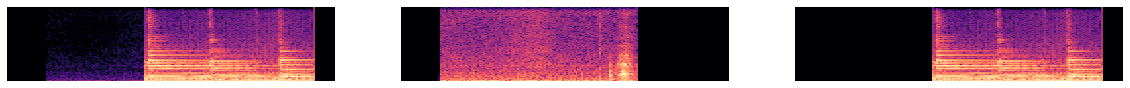

In [53]:

fig = plt.figure(figsize=(20, 3))
cs = [c_agg] + c_gts
for i, c in enumerate(cs):
    plt.subplot(2, 3, i + 1)
    display(c, fs)
    plt.axis('off')


In [54]:
import scipy.io.wavfile
from scipy.fftpack import dct
import scipy.signal
import IPython.display
import librosa
import librosa.display
import matplotlib.pyplot as plt

# _, rdata = scipy.signal.istft(c, fs=44100, nfft = 256)
# IPython.display.Audio(data=rdata, rate=44100)

transformer model

In [10]:
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
print(device)

cuda:3


In [ ]:
512,3,4,128,64
512,4,4,128,128,
VTF,euclidean,2-20000-2,Min,1,72,400,0.001,Adam,128,0.5,0.0,0.9,0.99,1e-09,512,16,16,4,4,128,128,8.758085429668427,/home/ubuntu/multimodal-listener/results/2-20000-2_euclidean_VTF_Min_190723/config_0/snapshots/best.tar,0.05


In [11]:
import model.transformer
_, seq_len, freq_range = aggregate.shape
print(seq_len)
print(freq_range)
net = model.transformer.make_model(freq_range, num_sources=2, N=2, d_model=128, d_ff=256, h=2,dropout=0.5).to(device)
checkpoint = torch.load('/home/ubuntu/experiment_logs/results/2-20000-2_euclidean_VTF_190727_2-s_5-c/config_0/snapshots/best.tar')

net.load_state_dict(checkpoint['model_state_dict'])
# checkpoint


460
258


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [12]:
from torch.autograd import Variable
subseq_mask = model.transformer.subsequent_mask(ground_truths_in.shape[1])
subseq_mask = Variable(subseq_mask).type_as(aggregate.data).to(device)

In [13]:
print(subseq_mask.shape)
# plt.figure(figsize=(5,5))
# plt.imshow(subseq_mask.cpu()[0])

torch.Size([1, 461, 461])


In [16]:
out = net(aggregate.to(device), ground_truths_in.to(device), None, subseq_mask.to(device))

aggregate

In [64]:
IPython.display.Audio(data=revs[1], rate=fs)

predicted separations

In [29]:
IPython.display.Audio(data=revvs[0], rate=fs)

In [30]:
IPython.display.Audio(data=revvs[1], rate=fs)

### Greedy decoding

In [34]:
seps = model.transformer.greedy_decoder(net, aggregate.to(device), seq_len, 2, freq_range, device)

In [35]:
print(seps.shape)
# pp = seps.view(-1, seq_len, 2, 258)
pp = torch.split(seps, 258, dim=-1)
oo = torch.stack(pp, dim=2)
print(oo.shape)

torch.Size([128, 460, 516])
torch.Size([128, 460, 2, 258])


In [36]:
def get_pred_spect(pp, num_sources, xid=0):
    cs = []
    for i in range(num_sources):
        g = pp[xid, :, i, :].cpu().numpy().T
        r = np.split(g, 2)[0]
        i = np.split(g, 2)[1]
        c = r + 1j * i
        cs.append(c)
    return cs

def get_pred_spect(ground_truths_gt, fs, nperseg, noverlap, xid=0):
    _, seq_len, nsource, input_dim = ground_truths_gt.shape
    
    c_gts = []
    revs = []
    for i in range(nsource):
        gt = ground_truths_gt[xid, :, i].cpu()
        c_gt, rev = get_spect(gt, fs, nperseg, noverlap)

        c_gts.append(c_gt)
        revs.append(rev)
    
    return c_gts, revs

def plot_cs(cs, dim):
    fig = plt.figure(figsize=(20, 3))
    cs = [c_agg] + cs
    for i, c in enumerate(cs):
        plt.subplot(dim[0], dim[1], i + 1)
        display(c, 22050)
        plt.axis('off')

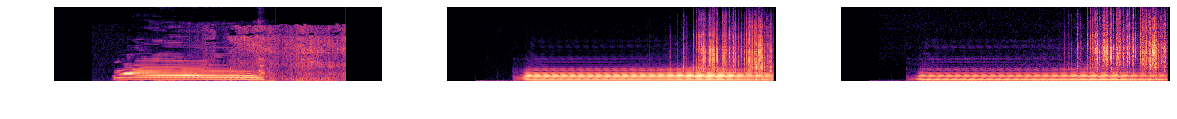

In [37]:
# cs = get_pred_spect(pp, 2, xid=0)
cs, revvs = get_pred_spect(oo, fs, nperseg, noverlap, xid)
plot_cs(cs, dim=(2, 3))

### random experiments

In [ ]:
a = torch.arange(12).view(4, 3)
a1 = a[:2].view(-1, 3)
a2 = a[2:].view(-1, 3)

print(a1)
print(a2)

print(torch.cat([a1, a2]))
print(torch.cat([a1, a2]).shape)
# print(a.sha)

In [ ]:
aa = torch.arange(12.).view(3, 4)
a = aa.view(4, 3)
# b = torch.ones(4, 3).copy_(a)
b = torch.cat([torch.ones(3).view(1,3), a])

print(aa)
print(a)
print(b)
aa.fill_(10)
print(a)
print(b)


In [ ]:
torch.ones(2, 3)
torch.zeros(2, 3)

In [ ]:

def check(m_c, m):
    for i in range(m_c.shape[0]):
        for j in range(m_c.shape[1]):
            batch = i // m.shape[1]
            ii = i % m.shape[1]
            assert(m_c[i][j] == m[batch][ii][j])
    print("passed")

check(agg_concat, agg)